<a href="https://colab.research.google.com/github/VladislavGrom1/Goggle-Collab/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
for dirpath, _, filenames in os.walk('/content/'):
  for filename in filenames:
    print(os.path.join(dirpath,filename))
!ls /content/sample_data/

In [ ]:
# из библиотеки google.colab импортируем класс files
from google.colab import files
# создаем объект этого класса, применяем метод

uploaded = files.upload()

type(uploaded['test.csv'])

# обратимся к ключу словаря uploaded и применим метод .decode()
uploaded_str = uploaded['test.csv'].decode()

# на выходе получаем обычную строку
print(type(uploaded_str))

# Выведем первые 35 значений.
print(uploaded_str[:35])

# Если разбить строку методом .split() по символам \r (возврат к началу строки) и \n (новая строка), то на выходе мы получим список.

uploaded_list = uploaded_str.split('\r\n')
type(uploaded_list)

for i, line in enumerate(uploaded_list):
# начнем выводить записи
  print(line)
  # когда дойдем до четвертой строки
  if i == 3:
    # прерывание
    break
    


In [19]:
# передадим функции open() адрес файла
# параметр 'r' означает, что мы хотим прочитать (read) файл
f1 = open('/content/train.csv', 'r')

# метод .read() помещает весь файл в одну строку
# выведем первые 142 символа (если параметр не указывать, выведется все содержимое)
print(f1.read(142))
# в конце файл необходимо закрыть
f1.close()

# снова откроем файл
f2 = open('/content/train.csv', 'r')
# пройдемся по нашему объекту в цикле for и параллельно создадим индекс
for i, line in enumerate(f2):
  # выведем строки без служебных символов по краям
  print(line.strip())
  # дойдя до четвертой строки, прервемся
  if i == 3:
    break

# не забудем закрыть файл
f2.close()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S


In [20]:
# скажем Питону: "открой файл и назови его f3"
with open('/content/test.csv', 'r') as f3:
  # "пройдись по строкам без служебных символов"
  for i, line in enumerate(f3):
    print(line.strip())
    # и "прервись на четвертой строке"
    if i == 3:
      break
      

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S
894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,,Q


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
Файл успешно сохранился в сессионное хранилище!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

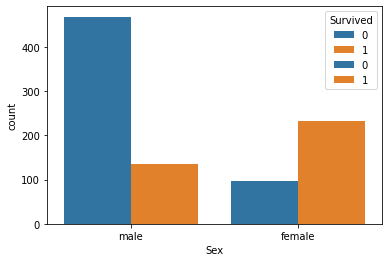

In [63]:
# импортируем библиотеку
import pandas as pd
# применим функцию read_csv() и посмотрим на первые три записи файла train.csv
train = pd.read_csv('/content/train.csv')
train.head(3)

test = pd.read_csv('/content/test.csv')
test.head(3)

####train.info()

# для построения графиков воспользуемся новой для нас библиотекой seaborn
import seaborn as sns

# посмотрим насколько значим класс билета для выживания пассажира
# с помощью x и hue мы можем уместить две категориальные переменные на одном графике
sns.countplot(x = 'Pclass', hue = 'Survived', data = train)

# кто выживал чаще, мужчины или женщины?
sns.countplot(x = 'Sex', hue = 'Survived', data = train)

# выявим пропущенные значения с помощью .isnull() и посчитаем их количество sum()


# переменная Cabin (номер каюты), скорее всего, не является самой важной
# избавимся от нее с помощью метода .drop()
# (параметр axis отвечает за столбцы, inplace = True сохраняет изменения)

train.drop(columns = 'Cabin', axis = 1, inplace = True)

# а вот Age (возраст) точно важен, заменим пустые значения средним арифметическим
train['Age'].fillna(train['Age'].mean(), inplace = True)

# у нас остаются две пустые строки в Embarked, удалим их
train.dropna(inplace = True)

train.isnull().sum()

# применим one-hot encoding к переменной Sex (пол) с помощью метода .get_dummies()
pd.get_dummies(train['Sex']).head(3)

# удалим первый столбец, он избыточен
sex = pd.get_dummies(train['Sex'], drop_first = True)
sex.head(3)

embarked = pd.get_dummies(train['Embarked'], drop_first = True)
pclass = pd.get_dummies(train['Pclass'], drop_first = True)

train = pd.concat([train, pclass, sex, embarked], axis = 1)
# применим функцию drop() к соответствующим столбцам
train.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'Ticket', 'Embarked'], axis = 1, inplace = True)
train.head(3)

# импортируем класс StandardScaler
from sklearn.preprocessing import StandardScaler
# создадим объект этого класса
scaler = StandardScaler()
# выберем те столбцы, которые мы хотим масштабировать
cols_to_scale = ['Age', 'Fare']
# рассчитаем среднее арифметическое и СКО для масштабирования данных
scaler.fit(train[cols_to_scale])
# применим их
train[cols_to_scale] = scaler.transform(train[cols_to_scale])
# посмотрим на результат
train.head(3)

#train.columns

#Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 2, 3, 'male', 'Q', 'S'], dtype='object')

train.columns = train.columns.map(str)

# поместим в X_train все кроме столбца Survived

X_train = train.drop('Survived', axis = 1)

# столбец 'Survived' станет нашей целевой переменной (y_train)

y_train = train['Survived']

X_train.head(3)

# импортируем логистическую регрессию из модуля linear_model библиотеки sklearn
from sklearn.linear_model import LogisticRegression
# создадим объект этого класса и запишем его в переменную model
model = LogisticRegression()
# обучим нашу модель
model.fit(X_train, y_train)

LogisticRegression()

# сделаем предсказание класса на обучающей выборке
y_pred_train = model.predict(X_train)

# построим матрицу ошибок
from sklearn.metrics import confusion_matrix

# передадим ей фактические и прогнозные значения
conf_matrix = confusion_matrix(y_train, y_pred_train)

conf_matrix_labels = pd.DataFrame(conf_matrix, columns =
['Прогноз погиб', 'Прогноз выжил'], index = ['Факт погиб', 'Факт выжил'])


# преобразуем в датафрейм
conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df

conf_matrix_labels


# рассчитаем метрику accuracy вручную
round((478 + 237)/(478 + 237 + 71 + 103), 3)

# импортируем метрику accuracy из sklearn
from sklearn.metrics import accuracy_score

# так же передадим ей фактические и прогнозные значения
model_accuracy = accuracy_score(y_train, y_pred_train)

# округлим до трех знаков после запятой
round(model_accuracy, 3)

test.info()

# для начала дадим датасету привычное название X_test
X_test = test

# заполним пропуски в переменных Age и Fare средним арифметическим
X_test['Age'].fillna(test['Age'].mean(), inplace = True)
X_test['Fare'].fillna(test['Fare'].mean(), inplace = True)
# выполним one-hot encoding категориальных переменных
sex = pd.get_dummies(X_test['Sex'], drop_first = True)
embarked = pd.get_dummies(X_test['Embarked'], drop_first = True)
pclass = pd.get_dummies(X_test['Pclass'], drop_first = True)
# присоединим новые столбцы к исходному датафрейму
X_test = pd.concat([test, pclass, sex, embarked], axis = 1)
# и удалим данные, которые теперь не нужны
X_test.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'Cabin', 'Ticket', 'Embarked'], axis = 1, inplace = True)
# посмотрим на результат
X_test.head(3)

# применим среднее арифметическое и СКО обучающей выборки для масштабирования тестовых данных
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.head(3)

X_test.columns = X_test.columns.map(str)
y_pred_test = model.predict(X_test)

# посмотрим на первые 10 прогнозных значений
y_pred_test[:10]

# файл с примером можно загрузить не с локального компьютера, а из Интернета
url = 'https://www.dmitrymakarov.ru/wp-content/uploads/2021/11/titanic_example.csv'

# просто поместим его url в функцию read_csv()
example = pd.read_csv(url)
example.head(3)
# возьмем индекс пассажиров из столбца PassengerId тестовой выборки

ids = test['PassengerId']

# создадим датафрейм из словаря, в котором
# первая пара ключа и значения - это id пассажира, вторая - прогноз "на тесте"

result = pd.DataFrame({'PassengerId': ids, 'Survived': y_pred_test})
# посмотрим, что получилось
result.head()

# создадим новый файл result.csv с помощью функции to_csv(), удалив при этом индекс
result.to_csv('result.csv', index = False)

# файл будет сохранен в 'Сессионном хранилище' и, если все пройдет успешно, выведем следующий текст:
print('Файл успешно сохранился в сессионное хранилище!')

# применим метод .download() объекта files
files.download('/content/result.csv')

